In [1]:
import pickle
with open('../data/output/perturbed_graphs.txt', 'rb') as f:
    perturbed_graphs = pickle.load(f)
    
len(perturbed_graphs)

1

In [40]:
import torch
from tqdm import tqdm
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

embeddings = torch.rand(5, 32, device=device)# (M, n_graph_embedding, )
prediction = torch.rand(32, device=device)

distances = torch.norm(embeddings - prediction, dim=1)
probabilities = 1 / distances
distances
# 
# (N, n_graph_embedding) x

RuntimeError: The size of tensor a (100) must match the size of tensor b (32) at non-singleton dimension 2

In [112]:

# Compute a probability distribution based on the distance to the prediction
# graph embeddings = num_possible_graphs x n_graph_embedding
# I want a batch_size x num_possible_graphs matrix of distances
graph_embeddings = torch.rand(8123, 100, device=device)
batch_predictions = torch.rand(350, 100, device=device)
graph_embeddings.unsqueeze(0).shape, graph_embeddings.unsqueeze(1).shape

(torch.Size([1, 8123, 100]), torch.Size([8123, 1, 100]))

In [88]:
graph_embeddings, batch_predictions

(tensor([[0.6171, 0.4735, 0.8750],
         [0.3778, 0.7247, 0.4049]], device='mps:0'),
 tensor([[0.8390, 0.5681, 0.2575],
         [0.8372, 0.3677, 0.9201],
         [0.0142, 0.9983, 0.2237],
         [0.4176, 0.1067, 0.3339],
         [0.5650, 0.9921, 0.4199]], device='mps:0'))

In [113]:

embedding_differences = graph_embeddings.unsqueeze(0) - batch_predictions.unsqueeze(1)
print(embedding_differences.shape)
# batch_size x len(graph_embeddings) x n_graph_embedding
abs_differences = torch.abs(embedding_differences)
print(abs_differences.shape)
# batch_size x len(graph_embeddings)
embedding_distances = torch.norm(abs_differences, dim=2)  # L1 norm
print(3, embedding_distances.shape)
probabilities = 1 / embedding_distances
print(probabilities.shape)
# 1 x batch_size
choices = torch.multinomial(probabilities, 1)
choices.cpu().numpy()

torch.Size([350, 8123, 100])
torch.Size([350, 8123, 100])
3 torch.Size([350, 8123])
torch.Size([350, 8123])


array([[4219],
       [7008],
       [1687],
       [3296],
       [3018],
       [1382],
       [5256],
       [7167],
       [ 615],
       [3281],
       [ 119],
       [6264],
       [3318],
       [2676],
       [4918],
       [7109],
       [6623],
       [ 135],
       [5231],
       [7477],
       [3621],
       [1145],
       [2827],
       [4899],
       [4699],
       [4640],
       [5893],
       [1624],
       [2360],
       [4438],
       [4074],
       [7053],
       [ 342],
       [2302],
       [  11],
       [1481],
       [5398],
       [4260],
       [5048],
       [4710],
       [3398],
       [2295],
       [ 372],
       [1839],
       [6945],
       [ 914],
       [2756],
       [6552],
       [5623],
       [5238],
       [3355],
       [1484],
       [2664],
       [3606],
       [1169],
       [2591],
       [ 812],
       [5673],
       [1959],
       [1939],
       [6756],
       [5300],
       [7478],
       [ 914],
       [6057],
       [4769],
       [75

In [115]:
distances = torch.norm(embedding_differences, dim=2)

In [118]:
distances.mean(dim=1)[0]

tensor(4.1469, device='mps:0')

In [1]:
import pickle
with open('../data/prov_dp/output/tc3-theia_N=10/pruned_graphs.pkl', 'rb') as f:
    pruned_graphs, train_data = pickle.load(f)

In [7]:
from utility import save_dot
big_trees = []
for _, tree in train_data:
    if len(tree.edges) > 5:
        big_trees.append(tree)
len(big_trees)

13

In [11]:
from pathlib import Path

save_dot(big_trees[0].to_dot(), Path('./big_tree.dot'))

In [46]:
import pandas as pd
df = pd.read_csv('../data/stats_trimmed.csv')
df['alpha'] = df['alpha'].astype(float)
df = df[df['alpha'].isin([0.1, 0.5, 0.9])]
# df['pruned_graph_size_mean'] = df['pruned_graph_size_mean'].astype(float)
len(df)

20

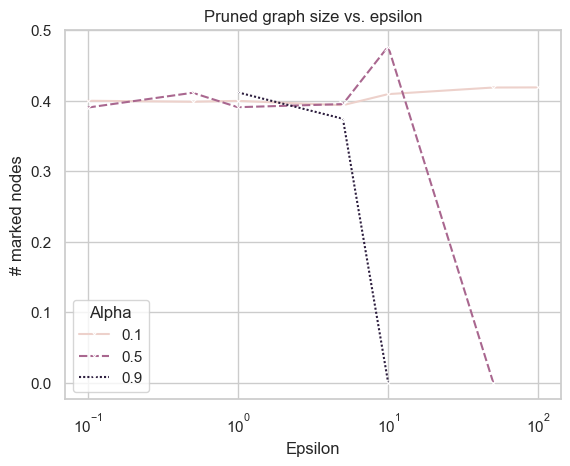

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set_style("whitegrid")
sns.set_palette('tab10')
ax = sns.lineplot(
    data=df,
    x='epsilon',
    y='% unmoved_subtrees_mean',
    hue='alpha',
    marker='x',
    style='alpha'
)
ax.set(xscale='log')
plt.title('Pruned graph size vs. epsilon')
plt.xlabel('Epsilon')
plt.ylabel('# marked nodes')
plt.legend(title='Alpha')
plt.show()

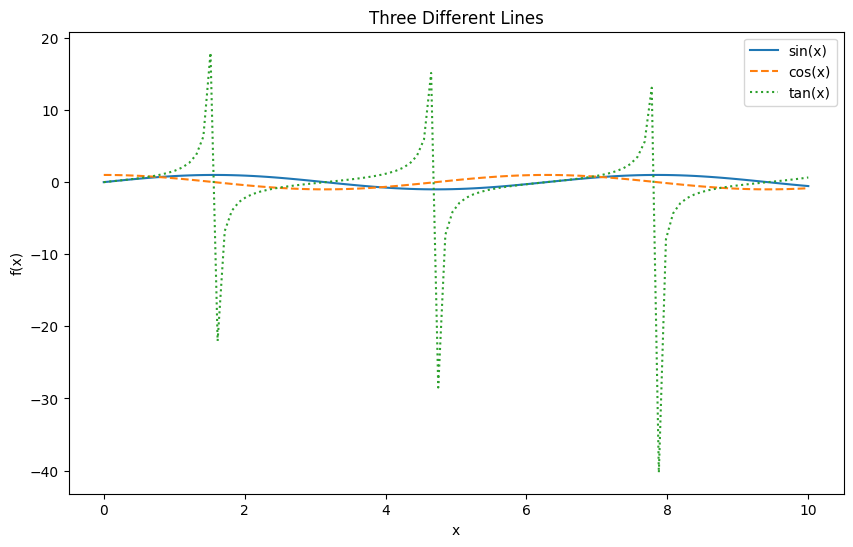

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)', linestyle='--')
plt.plot(x, y3, label='tan(x)', linestyle=':')

# Add legend
plt.legend()

# Add title and labels
plt.title('Three Different Lines')
plt.xlabel('Epsilon')
plt.ylabel('# Graphs pruned')

# Show plot
plt.show()